# CDC Data 1998-2015

### Effects on people in the US

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
occur_df = pd.read_csv('../data_files/dist_org_prep_1998_2015_CDC.csv')
occur_df.head()

,Year,Month,State,Genus Species,Serotype or Genotype,Etiology Status,Location of Preparation,Illnesses,Hospitalizations,Deaths,Food Vehicle,Contaminated Ingredient
0,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,0.0,NaN,NaN
1,2009,1,Minnesota,Norovirus,NaN,Confirmed,NaN,16,0.0,0.0,NaN,NaN
2,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5,0.0,0.0,NaN,NaN
3,2009,1,Minnesota,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3,0.0,0.0,NaN,NaN
4,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21,0.0,0.0,cookies,NaN


In [3]:
#Total number of illnesses reported in timeframe:

In [4]:
ill_obs = occur_df['Illnesses'].sum()
ill_obs

373531

In [5]:
#Total number of hospitalizations reported in timeframe:

In [6]:
hops_obs = occur_df['Hospitalizations'].sum()
hops_obs

14681.0

In [7]:
#Total number of deaths reported in timeframe:

In [8]:
death_obs = occur_df['Deaths'].sum()
death_obs

337.0

In [9]:
occur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19119 entries, 0 to 19118
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     19119 non-null  int64  
 1   Month                    19119 non-null  int64  
 2   State                    19119 non-null  object 
 3   Genus Species            12500 non-null  object 
 4   Serotype or Genotype     3907 non-null   object 
 5   Etiology Status          12500 non-null  object 
 6   Location of Preparation  17984 non-null  object 
 7   Illnesses                19119 non-null  int64  
 8   Hospitalizations         15494 non-null  float64
 9   Deaths                   15518 non-null  float64
 10  Food Vehicle             10156 non-null  object 
 11  Contaminated Ingredient  1876 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.8+ MB


In [10]:
#New column...'Month/Year'
cols=["Month","Year"]
occur_df['Month/Year'] = occur_df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
occur_df

,Year,Month,State,Genus Species,Serotype or Genotype,Etiology Status,Location of Preparation,Illnesses,Hospitalizations,Deaths,Food Vehicle,Contaminated Ingredient,Month/Year
0,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,0.0,NaN,NaN,1-2009
1,2009,1,Minnesota,Norovirus,NaN,Confirmed,NaN,16,0.0,0.0,NaN,NaN,1-2009
2,2009,1,Minnesota,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,5,0.0,0.0,NaN,NaN,1-2009
3,2009,1,Minnesota,Norovirus,NaN,Confirmed,"Restaurant - ""Fast-food""(drive up service or p...",3,0.0,0.0,NaN,NaN,1-2009
4,2009,1,Minnesota,Norovirus,NaN,Confirmed,Restaurant - other or unknown type,21,0.0,0.0,cookies,NaN,1-2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19114,2014,12,Idaho,Cryptosporidium,NaN,Confirmed,Farm/dairy,4,1.0,0.0,"milk, unpasteurized",NaN,12-2014
19115,2015,3,Idaho,Campylobacter,NaN,Confirmed,Farm/dairy,4,0.0,0.0,"cottage cheese, unpasteurized",NaN,3-2015
19116,2015,9,Idaho,"Campylobacter jejuni; Escherichia coli, Shiga ...",O157:H7,Confirmed; Confirmed,Farm/dairy,15,3.0,0.0,"milk, unpasteurized",NaN,9-2015
19117,2015,11,Idaho,Campylobacter,NaN,Confirmed,NaN,8,0.0,0.0,"cheese, unspecified, unpasteurized",NaN,11-2015


In [11]:
occur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19119 entries, 0 to 19118
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     19119 non-null  int64  
 1   Month                    19119 non-null  int64  
 2   State                    19119 non-null  object 
 3   Genus Species            12500 non-null  object 
 4   Serotype or Genotype     3907 non-null   object 
 5   Etiology Status          12500 non-null  object 
 6   Location of Preparation  17984 non-null  object 
 7   Illnesses                19119 non-null  int64  
 8   Hospitalizations         15494 non-null  float64
 9   Deaths                   15518 non-null  float64
 10  Food Vehicle             10156 non-null  object 
 11  Contaminated Ingredient  1876 non-null   object 
 12  Month/Year               19119 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 1.9+ MB


In [12]:
occur_df['Illnesses'].value_counts()

2      2935
3      2024
4      1636
5      1095
6       976
       ... 
715       1
283       1
235       1
219       1
495       1
Name: Illnesses, Length: 302, dtype: int64

In [13]:
occur_df['Location of Preparation'].value_counts()

Restaurant - other or unknown type                                                                                                                                                             8125
Restaurant - Sit-down dining                                                                                                                                                                   2229
Private home/residence                                                                                                                                                                         1608
Caterer (food prepared off-site from where served)                                                                                                                                             1053
Other (describe in remarks)                                                                                                                                                                    1031
                    

### Drilldown by Year

In [14]:
yr_outcomes_df=occur_df.groupby(by='Year').sum()
yr_outcomes_df=yr_outcomes_df.drop(columns='Month')
yr_outcomes_df

,Illnesses,Hospitalizations,Deaths
Year,,,
1998,27156,886.0,33.0
1999,24899,598.0,10.0
2000,26033,728.0,22.0
2001,25192,665.0,11.0
2002,24939,734.0,14.0
2003,23079,687.0,24.0
2004,29034,779.0,22.0
2005,19761,592.0,8.0
2006,28656,1170.0,10.0


In [15]:
#Stats per year...
yr_outcomes_df.describe()

,Illnesses,Hospitalizations,Deaths
count,18.000000,18.000000,18.000000
mean,20751.722222,815.611111,18.722222
std,5714.847379,198.188899,9.417166
min,13295.000000,546.000000,7.000000
25%,15000.750000,670.500000,11.750000
50%,22024.500000,756.500000,19.000000
75%,25128.750000,913.750000,22.000000
max,29034.000000,1250.000000,45.000000


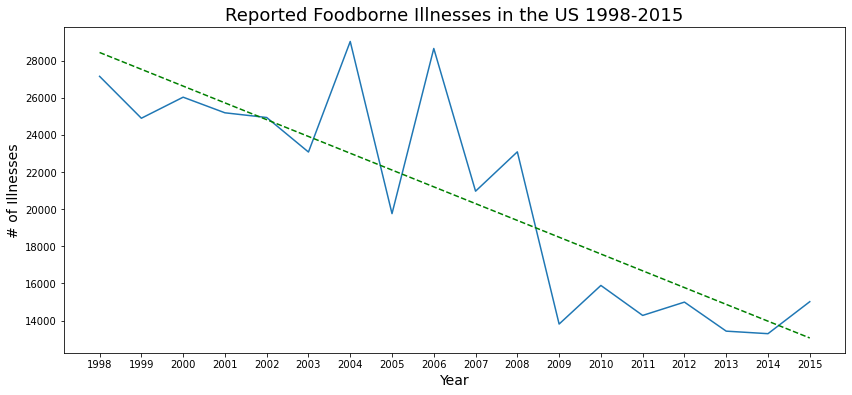

In [16]:
plt.figure(figsize=(14,6))

ill_trend=np.array(yr_outcomes_df['Illnesses'])
z=np.polyfit(yr_outcomes_df.index.values, ill_trend, 1)
p=np.poly1d(z)
plt.plot(yr_outcomes_df.index.values, yr_outcomes_df['Illnesses'])
plt.plot(yr_outcomes_df.index.values, p(yr_outcomes_df.index.values), 'g--')

plt.xticks(yr_outcomes_df.index.values)
plt.xlabel('Year', fontsize=14)
plt.ylabel("# of Illnesses", fontsize=14)
plt.title('Reported Foodborne Illnesses in the US 1998-2015', fontsize=18);

In [17]:
#In 2009, existing foodborne and waterborne disease outbreak surveillance systems were transitioned to an 
#enhanced reporting platform, the National Outbreak Reporting System (NORS)
#A new electronic reporting form and data entry interface were also introduced. In 2009, the 
#number of reported foodborne disease outbreaks declined 32% compared with the mean of the preceding 5 years.
#**Factors Contributing to Decline in Foodborne Disease Outbreak Reports, United States; 
#Emerg Infect Dis. 2014 Sep; 20(9): 1551–1553.

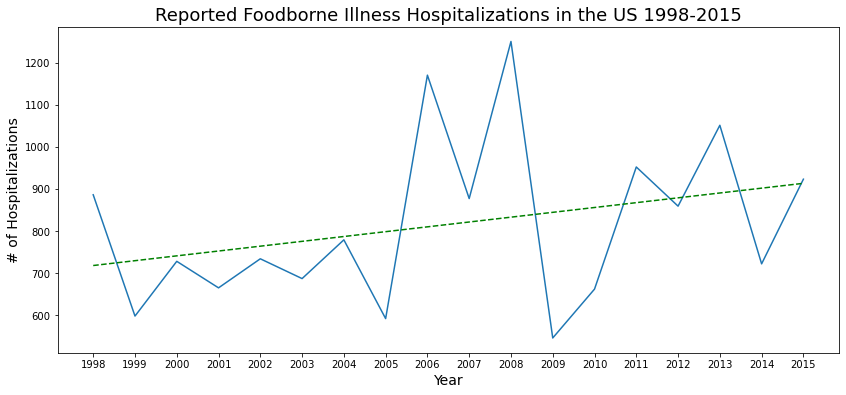

In [18]:
plt.figure(figsize=(14,6))

hosp_trend=np.array(yr_outcomes_df['Hospitalizations'])
z=np.polyfit(yr_outcomes_df.index.values, hosp_trend, 1)
p=np.poly1d(z)
plt.plot(yr_outcomes_df.index.values, yr_outcomes_df['Hospitalizations'])
plt.plot(yr_outcomes_df.index.values, p(yr_outcomes_df.index.values), 'g--')

plt.xticks(yr_outcomes_df.index.values)
plt.xlabel('Year', fontsize=14)
plt.ylabel("# of Hospitalizations", fontsize=14)
plt.title('Reported Foodborne Illness Hospitalizations in the US 1998-2015', fontsize=18);

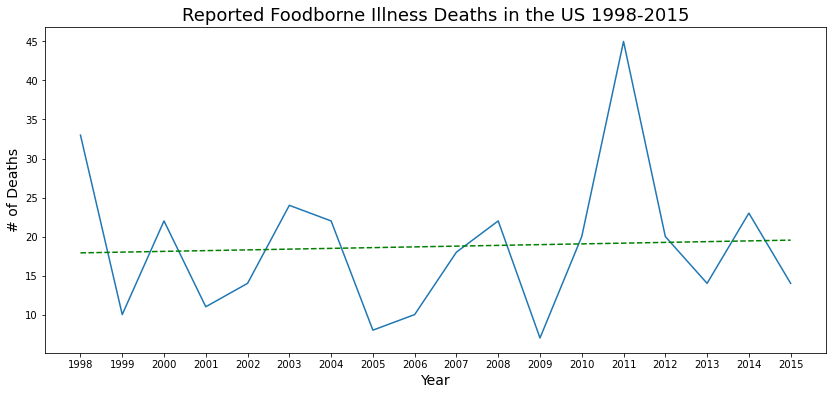

In [19]:
plt.figure(figsize=(14,6))

death_trend=np.array(yr_outcomes_df['Deaths'])
z=np.polyfit(yr_outcomes_df.index.values, death_trend, 1)
p=np.poly1d(z)
plt.plot(yr_outcomes_df.index.values, yr_outcomes_df['Deaths'])
plt.plot(yr_outcomes_df.index.values, p(yr_outcomes_df.index.values), 'g--')

plt.xticks(yr_outcomes_df.index.values)
plt.xlabel('Year', fontsize=14)
plt.ylabel("# of Deaths", fontsize=14)
plt.title('Reported Foodborne Illness Deaths in the US 1998-2015', fontsize=18);

### Drilldown by State

In [20]:
st_outcomes_df=occur_df.groupby(by='State').sum()
st_outcomes_df=st_outcomes_df.drop(columns='Month').drop(columns='Year')
st_outcomes_df=st_outcomes_df.sort_values('Illnesses', ascending=False).head(10)
st_outcomes_df

,Illnesses,Hospitalizations,Deaths
State,,,
California,39992,1062.0,26.0
Illinois,24700,713.0,5.0
Multistate,24573,4011.0,150.0
Florida,23050,684.0,23.0
Ohio,20451,659.0,8.0
New York,17407,591.0,12.0
Michigan,14471,357.0,5.0
Texas,14187,337.0,14.0
Minnesota,13533,373.0,3.0


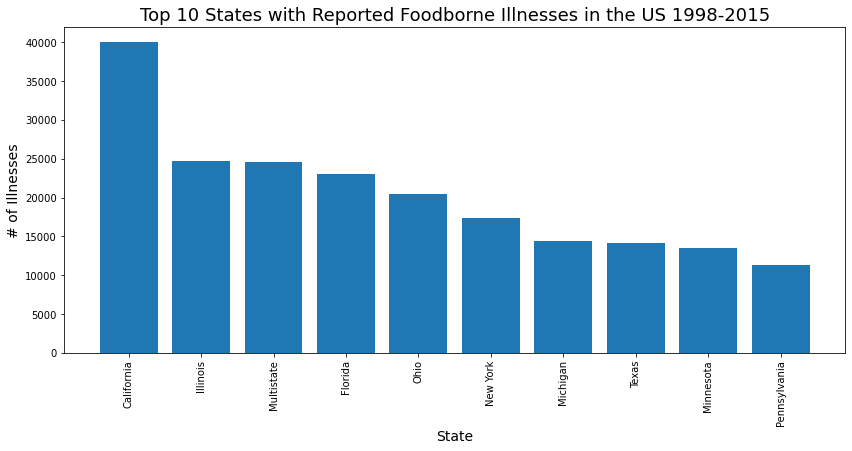

In [21]:
plt.figure(figsize=(14,6))
plt.bar(st_outcomes_df.index.values, st_outcomes_df['Illnesses'])

plt.xticks(st_outcomes_df.index.values, rotation=90)
plt.xlabel('State', fontsize=14)
plt.ylabel("# of Illnesses", fontsize=14)
plt.title('Top 10 States with Reported Foodborne Illnesses in the US 1998-2015', fontsize=18);

In [22]:
# The 10 Most Populous States In America For 2021
# California
# Texas
# Florida
# New York
# Pennsylvania
# Illinois
# Ohio
# Georgia
# North Carolina
# Michigan

### Drilldown by bug

In [23]:
bug_outcomes_df=occur_df.groupby(by='Genus Species').sum()
bug_outcomes_df=bug_outcomes_df.drop(columns='Month').drop(columns='Year')
bug_outcomes_df=bug_outcomes_df.sort_values('Illnesses', ascending=False).head(10)
bug_outcomes_df

,Illnesses,Hospitalizations,Deaths
Genus Species,,,
Norovirus Genogroup I,76406,668.0,2.0
Salmonella enterica,60018,6888.0,82.0
Norovirus Genogroup II,38175,518.0,6.0
Clostridium perfringens,28734,106.0,12.0
Norovirus unknown,17181,164.0,4.0
"Escherichia coli, Shiga toxin-producing",8719,1919.0,35.0
Staphylococcus aureus,8409,419.0,3.0
Campylobacter jejuni,6438,207.0,1.0
Shigella sonnei,6236,224.0,2.0


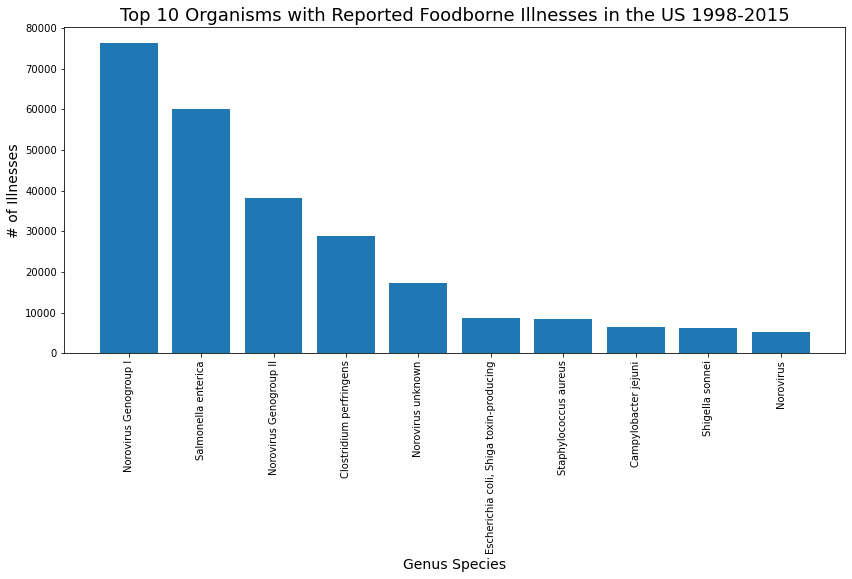

In [24]:
plt.figure(figsize=(14,6))
plt.bar(bug_outcomes_df.index.values, bug_outcomes_df['Illnesses'])

plt.xticks(bug_outcomes_df.index.values, rotation=90)
plt.xlabel('Genus Species', fontsize=14)
plt.ylabel("# of Illnesses", fontsize=14)
plt.title('Top 10 Organisms with Reported Foodborne Illnesses in the US 1998-2015', fontsize=18);